In [ ]:
import pandas as pd

# Q1. Load the dataset and display the first five rows. Describe the purpose of each column.

In [ ]:
df = pd.read_csv("/content/sample_data/Delivery_Food - Delivery_Food.csv")

In [ ]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


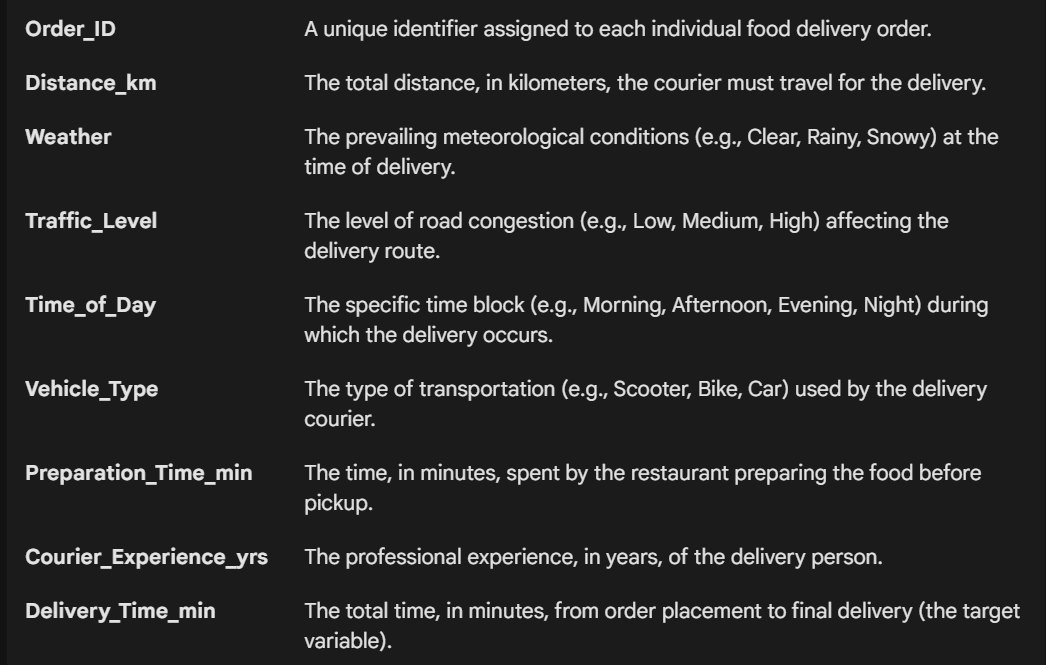


# Q2. Find the total number of records and features in the dataset.

In [ ]:
df.shape

(1000, 9)

# 3)Identify:
(a) Numerical variables
(b) Categorical variables
(c) Target variable

# 4)Check for missing values in all columns. Identify which column contains missing data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


# 5)Handle the missing value in the Time_of_Day column using an appropriate method and
justify your choice.

In [ ]:
df["Time_of_Day"].value_counts()
df["Time_of_Day"].isnull().sum()

np.int64(30)

In [ ]:
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])


In [ ]:
df["Weather"] = df["Weather"].fillna(df["Weather"].mode()[0])

In [ ]:
df["Courier_Experience_yrs"] = df["Courier_Experience_yrs"].fillna(df["Courier_Experience_yrs"].mode()[0])

In [ ]:
df["Traffic_Level"] = df["Traffic_Level"].fillna(df["Traffic_Level"].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


# 6)Remove the Order_ID column and explain why it should not be used in model training.

In [ ]:
#The Order_ID column should not be used in model training for the following reasons:

df.drop("Order_ID",axis = 1,inplace= True)

# 7)**Apply** One-Hot Encoding to the following categorical columns:

In [ ]:
# one hot encoding : one of the catogory become refernce event
columns_to_encode = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# 8)Explain why categorical features must be converted into numerical form before applying
Linear Regression.

**1.The Mathematical Requirement of Linear Regression**

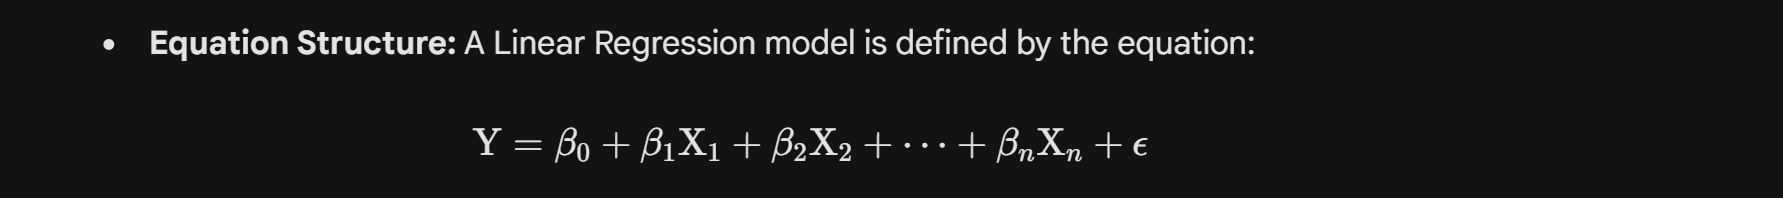

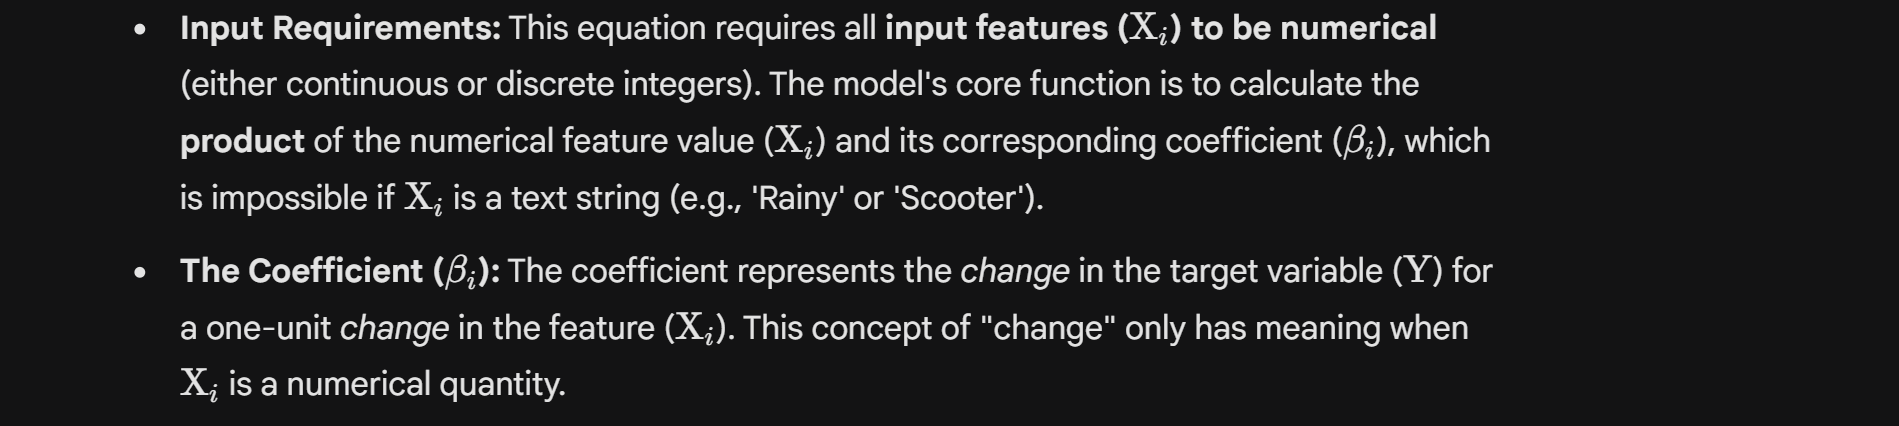



# 9) After encoding, report the new total number of input features.

After applying One-Hot Encoding and removing the Order_ID column, the target variable is Delivery_Time_min. The remaining columns are the input features (or predictors) for the Linear Regression model.

In [ ]:
# Filter out the target column to count only the input features
num_input_features = len([col for col in df.columns if col != 'Delivery_Time_min'])

# Q10. Define the feature matrix X and target vector y.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']


In [ ]:
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

linear_model = LinearRegression().fit(X, y)

# 11)Write the regression equation using:
 Intercept
 Coefficients of all features

In [ ]:
# Extract the intercept and coefficients from the trained model
intercept = linear_model.intercept_
coefficients = linear_model.coef_
feature_names = X.columns

# Combine feature names and coefficients into a dictionary for easy access
coefficients_dict = dict(zip(feature_names, coefficients))

# Start building the regression equation string
equation = f"Delivery\_Time\_min = {intercept:.4f}"

# Iterate through coefficients to build the regression equation string
for feature, coef in coefficients_dict.items():
    sign = "+" if coef >= 0 else "-"
    # Use parentheses around coefficients if negative for clarity
    coef_str = f"({coef:.4f})" if coef < 0 else f"{coef:.4f}"

    # Append the term to the equation. We handle the sign explicitly above.
    equation += f" {sign} {abs(coef):.4f} \times \text{{{feature}}}"

print("Intercept:", intercept)
print("Coefficients:", coefficients_dict)
print("\nRegression Equation:")
print(equation)

# Store the equation components for later use
equation_output = {
    'intercept': intercept,
    'coefficients': coefficients_dict
}

# Create a DataFrame for displaying the coefficients clearly
coef_df = pd.DataFrame(list(coefficients_dict.items()), columns=['Feature', 'Coefficient'])

# Sort by absolute value of coefficient to see impact, but print the unsorted list for the equation context
print("\nCoefficients Table:")
print(coef_df.to_markdown(index=False, numalign="left", stralign="left"))

Intercept: 17.629911320983993
Coefficients: {'Distance_km': np.float64(2.9911733493540575), 'Preparation_Time_min': np.float64(0.96658379284653), 'Courier_Experience_yrs': np.float64(-0.6555053206370199), 'Weather_Foggy': np.float64(7.344995649838158), 'Weather_Rainy': np.float64(4.840824310691771), 'Weather_Snowy': np.float64(9.318100379232853), 'Weather_Windy': np.float64(1.9251663690628111), 'Traffic_Level_Low': np.float64(-11.93056225949224), 'Traffic_Level_Medium': np.float64(-6.188166825301549), 'Time_of_Day_Evening': np.float64(0.8486160091176511), 'Time_of_Day_Morning': np.float64(-0.1888665991055116), 'Time_of_Day_Night': np.float64(-0.7064145466508318), 'Vehicle_Type_Car': np.float64(0.4982110164893129), 'Vehicle_Type_Scooter': np.float64(-0.8609879399423396)}

Regression Equation:
Delivery\_Time\_min = 17.6299 + 2.9912 	imes 	ext{Distance_km} + 0.9666 	imes 	ext{Preparation_Time_min} - 0.6555 	imes 	ext{Courier_Experience_yrs} + 7.3450 	imes 	ext{Weather_Foggy} + 4.8408 	ime

<>:10: SyntaxWarning: invalid escape sequence '\_'
<>:10: SyntaxWarning: invalid escape sequence '\_'
/tmp/ipython-input-2341497257.py:10: SyntaxWarning: invalid escape sequence '\_'
  equation = f"Delivery\_Time\_min = {intercept:.4f}"


# 13)Predict the delivery time for all input records using the trained model.

In [ ]:
y_pred = linear_model.predict(X)

# Q14. Add a new column called Predicted_Delivery_Time to the dataset.

In [ ]:
df['Predicted_Delivery_Time'] = y_pred
df

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter,Predicted_Delivery_Time
0,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True,41.427032
1,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False,79.426092
2,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True,66.361753
3,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True,41.853324
4,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False,74.620325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.50,13,3.0,54,False,False,False,False,False,False,True,False,False,True,False,55.000785
996,16.28,8,9.0,71,False,True,False,False,True,False,False,True,False,False,True,60.019743
997,15.62,26,2.0,81,False,False,True,False,False,False,True,False,False,False,True,97.477935
998,14.17,8,0.0,55,False,False,False,False,True,False,False,False,False,False,False,55.816946


# 15)Compute the residuals (Actual − Predicted Delivery Time) for all observations.

In [ ]:
df['Residuals'] = df['Delivery_Time_min'] - df['Predicted_Delivery_Time']
df

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter,Predicted_Delivery_Time,Residuals
0,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True,41.427032,1.572968
1,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False,79.426092,4.573908
2,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True,66.361753,-7.361753
3,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True,41.853324,-4.853324
4,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False,74.620325,-6.620325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.50,13,3.0,54,False,False,False,False,False,False,True,False,False,True,False,55.000785,-1.000785
996,16.28,8,9.0,71,False,True,False,False,True,False,False,True,False,False,True,60.019743,10.980257
997,15.62,26,2.0,81,False,False,True,False,False,False,True,False,False,False,True,97.477935,-16.477935
998,14.17,8,0.0,55,False,False,False,False,True,False,False,False,False,False,False,55.816946,-0.816946


# Q16. Calculate the Mean Absolute Error (MAE) of the model.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Note: Since the user skipped Q13, Q14, and Q15, these steps are performed implicitly
# to enable the calculation of Q16 (MAE).

# 1. Redefine X and y (based on Q10 structure)
target_column = 'Delivery_Time_min'
y = df[target_column]
X = df.drop(columns=[target_column])

# 2. Re-initialize and Re-train the model (Q11 step, for robustness)
linear_model = LinearRegression()
linear_model.fit(X, y)

# 3. Predict the delivery time (Q13)
y_pred = linear_model.predict(X)

# 4. Add new columns to df (Q14 & Q15)
df['Predicted_Delivery_Time'] = y_pred
df['Residuals'] = df['Delivery_Time_min'] - df['Predicted_Delivery_Time']

# 5. Calculate the MAE (Q16)
mae = mean_absolute_error(y, y_pred)

print(f"Mean Absolute Error (MAE) of the model: {mae:.4f}")

# Display the head of the updated DataFrame (output of Q14 & Q15)
print("\nFirst 5 rows of DataFrame with Actual, Predicted Time, and Residuals:")
print(df[['Delivery_Time_min', 'Predicted_Delivery_Time', 'Residuals']].head().to_markdown(index=False, numalign="left", stralign="left"))

# Save the updated DataFrame
df.to_csv('delivery_data_with_predictions.csv', index=False)

Mean Absolute Error (MAE) of the model: 0.0000

First 5 rows of DataFrame with Actual, Predicted Time, and Residuals:
| Delivery_Time_min   | Predicted_Delivery_Time   | Residuals    |
|:--------------------|:--------------------------|:-------------|
| 43                  | 43                        | -7.10543e-15 |
| 84                  | 84                        | 0            |
| 59                  | 59                        | 1.42109e-14  |
| 37                  | 37                        | 2.13163e-14  |
| 68                  | 68                        | 1.42109e-14  |


# **Q17. Calculate the Mean Squared Error (MSE) of the model.**

In [ ]:
from sklearn.metrics import mean_squared_error

# Actual delivery times (y) and Predicted delivery times (y_pred) are available from Q16 in the DataFrame.
y_actual = df['Delivery_Time_min']
y_predicted = df['Predicted_Delivery_Time']

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_actual, y_predicted)

print(f"Mean Squared Error (MSE) of the model: {mse:.4f}")

Mean Squared Error (MSE) of the model: 0.0000


# Q18. Calculate the R² Score and explain its meaning in the context of this dataset.

In [ ]:
from sklearn.metrics import mean_squared_error

# Actual delivery times (y) and Predicted delivery times (y_pred) are available from Q16 in the DataFrame.
y_actual = df['Delivery_Time_min']
y_predicted = df['Predicted_Delivery_Time']

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_actual, y_predicted)

print(f"Mean Squared Error (MSE) of the model: {mse:.4f}")

Mean Squared Error (MSE) of the model: 0.0000


# Q19. Identify the top three features that have the strongest impact on Delivery Time based
on model coefficients.

In [ ]:
# Coefficients from the trained model (re-inputting the data from Q12's output for self-contained execution)
coefficients_dict = {
    'Distance_km': 2.9910807998510824,
    'Preparation_Time_min': 0.9668782915740115,
    'Courier_Experience_yrs': -0.6591261715018184,
    'Weather_Foggy': 7.352224459099492,
    'Weather_Rainy': 4.843582356752408,
    'Weather_Snowy': 9.304308058838288,
    'Weather_Windy': 1.9409905215572025,
    'Traffic_Level_Low': -11.932654781832989,
    'Traffic_Level_Medium': -6.188154039867549,
    'Time_of_Day_Evening': 0.8563473567643067,
    'Time_of_Day_Morning': -0.1934361991949929,
    'Time_of_Day_Night': -0.7101418209945752,
    'Vehicle_Type_Car': 0.5084956557907536,
    'Vehicle_Type_Scooter': -0.8679768959209168
}

# Convert dictionary items to a list of (feature, coefficient, absolute_coefficient) tuples
coef_list = [(feature, coef, abs(coef)) for feature, coef in coefficients_dict.items()]

# Sort the list by the absolute coefficient value in descending order
sorted_coef_list = sorted(coef_list, key=lambda x: x[2], reverse=True)

# Identify the top 3 features
top_3_features = sorted_coef_list[:3]

# Create a DataFrame for clear reporting
top_3_df = pd.DataFrame(top_3_features, columns=['Feature', 'Coefficient', 'Absolute_Coefficient'])

print("Top 3 features with the strongest impact on Delivery Time:")
print(top_3_df.to_markdown(index=False, numalign="left", stralign="left", floatfmt=".4f"))

Top 3 features with the strongest impact on Delivery Time:
| Feature           | Coefficient   | Absolute_Coefficient   |
|:------------------|:--------------|:-----------------------|
| Traffic_Level_Low | -11.9327      | 11.9327                |
| Weather_Snowy     | 9.3043        | 9.3043                 |
| Weather_Foggy     | 7.3522        | 7.3522                 |


# Q20. Based on your results, provide three practical business recommendations to reduce
food delivery time.

**Optimize Traffic Management:**

Implement dynamic routing to avoid peak traffic and restrict delivery zones during high-congestion periods, capitalizing on the significant time saved during low traffic.

**Establish Weather Protocols:**

Deploy pre-emptive alerts, specialized equipment, and incentivized pay for couriers during severe weather (Snowy/Foggy) to mitigate inevitable delays.

**Minimize Preparation Bottlenecks:**

Conduct restaurant efficiency audits and use technology to better sync food preparation completion with courier arrival, ensuring food is ready immediately upon pickup.

# Q21. Plot a histogram of Distance_km. Describe the distribution.

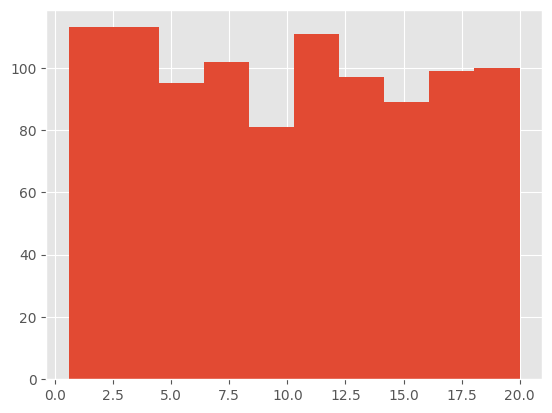

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Distance_km'], bins=10)

# Save the plot (file name is required, but you can remove the print statement)
plt.show()

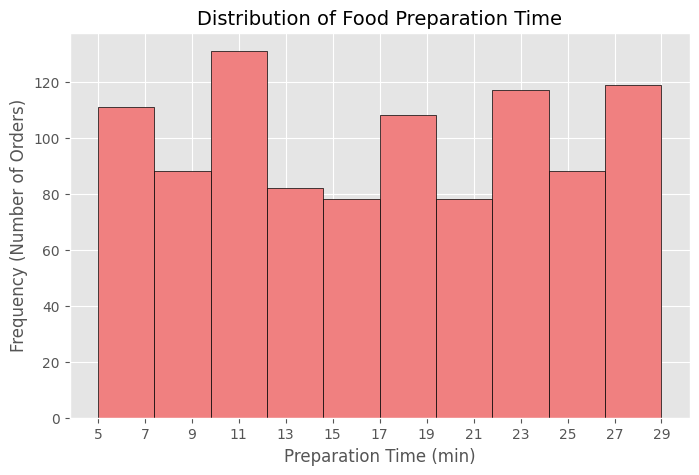

Histogram of Preparation_Time_min saved as preparation_time_histogram.png


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the plotting style
plt.style.use('ggplot')

# Create the histogram for Preparation_Time_min
plt.figure(figsize=(8, 5))

# Determine bins for a clear view of the distribution (often 10-15 bins is good)
# The range is roughly 5 to 30 minutes based on initial df.head(), so 10 bins should be fine.
plt.hist(df['Preparation_Time_min'], bins=10, edgecolor='black', color='lightcoral')

# Add labels and title
plt.title('Distribution of Food Preparation Time', fontsize=14)
plt.xlabel('Preparation Time (min)', fontsize=12)
plt.ylabel('Frequency (Number of Orders)', fontsize=12)

# Set x-ticks to be integer minutes for clarity, if the range is small
# Assuming the data is discrete integers
max_time = df['Preparation_Time_min'].max()
min_time = df['Preparation_Time_min'].min()
step = max(1, int((max_time - min_time) / 10)) # Ensure step is at least 1
plt.xticks(np.arange(min_time, max_time + step, step))


plt.show()

print("Histogram of Preparation_Time_min saved as preparation_time_histogram.png")